In [153]:
# https://github.com/panicpotatoe/dataset
# 1.mỗi features có bao nhiêu missing values
# 2.đối với mỗi features thì sử dụng phương pháp gì (drop / impute, etc...)?
# 3.xác định outliers của từng features và xử lý outliers
# 4.so sánh tính chất của raw data và data đã được pre-processed (số lượng r/c, distribution, etc..)

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype


In [155]:
df = pd.read_csv('https://raw.githubusercontent.com/panicpotatoe/dataset/master/titatic_train.csv')
df.shape

(891, 12)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
# Cau 1
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [158]:
# Ta thấy có 3 cột chứa missing value Age, Cabin, Embarked

In [159]:
#2. Cách xử lý các missing value trên
# Age: dùng phương pháp điền giá trị mean cho missing value ở cột Age
# Cabin: điền giá trị 0 vào vị trí NA
# Embarked: xoá nếu chứa NA

In [160]:
#Age
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(int(mean_age))
df['Age'] 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [161]:
#Cabin
#Vì đây là cột có giá trị null nhiều nhất, nếu xoá thì bộ dữ liệu train sẽ còn lại rất ít
# Vì vậy tiến hành điền giá trị 0 cho những vị trí NA, với ý nghĩa là người dùng ko cung cấp thông tin vị trí cabin
df['Cabin'] = df['Cabin'].fillna(0)

In [162]:
#Embarked
df.dropna(subset=['Embarked'], inplace=True)

In [163]:
# bộ dữ liệu sau khi xử lý NA
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

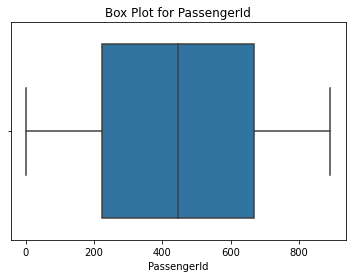

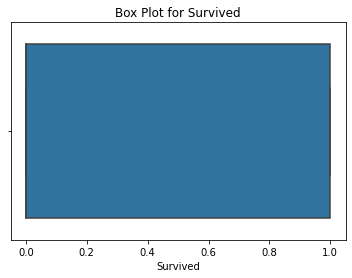

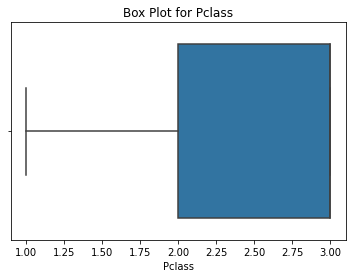

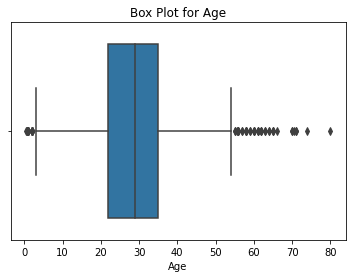

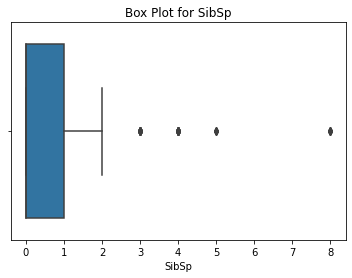

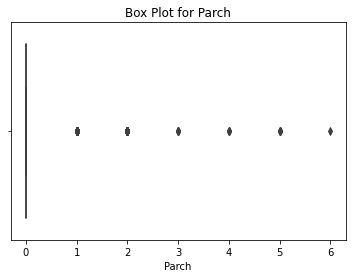

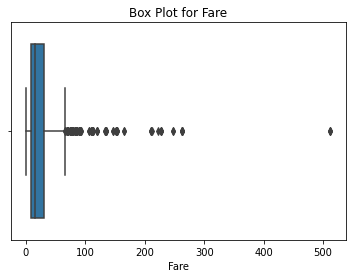

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 889, dtype: int64
Series([], Name: PassengerId, dtype: int64)
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64
Series([], Name: Survived, dtype: int64)
0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64
Series([], Name: Pclass, dtype: int64)
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64
7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
824     2.00
827     1.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 65, dtype: float64
0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888   

In [164]:
# Cau 3
header = df.columns

def check_outliers(val):
    k = 1.5
    Q1 = val.quantile(0.25)
    Q3 = val.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    res = val[(val < lower_bound) | (val > upper_bound)]
    return res

#trước khi xủ lý outliers
for i in header:
    if is_numeric_dtype(df[i]):
        plt.figure()
        sns.boxplot(x=df[i])
        plt.title(f'Box Plot for {i}')
        plt.show()


#Xử lý outliers
for i in header:
    if is_numeric_dtype(df[i]):
        print(check_outliers(df[i]))

In [165]:
# cau 4
#
